# DS 3000 - Practicum 2

**Date**: 6/18/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [60]:
import pandas as pd
#import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as KNC


## Question 1 — The DS Problem (0 point)

The goal of this practicum is to develop and tune machine learning models to predict diabetic outcomes based on various health indicators from the CDC Diabetes Health Indicators dataset. We aim to understand the relationship between lifestyle, social determinants of health, and diabetes, and to identify significant features that contribute to diabetic conditions. This insight will help in creating preventive measures and better management strategies for diabetes.



## Question 2 — Prepare the Data (5 pts)

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.

In [25]:
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015-2.csv")
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [26]:
# Display the info of the data frame
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [27]:
binary_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
               'DiffWalk', 'Sex']
ordinal_columns = ['GenHlth', 'Education', 'Income']
discrete_columns = ['Age']
continuous_columns = ['BMI', 'MentHlth', 'PhysHlth']

# Convert binary columns to category type
for columns in binary_columns:
    diabetes_df[columns] = diabetes_df[columns].astype('category')

# Convert ordinal columns to category with order
for columns in ordinal_columns:
    diabetes_df[columns] = pd.Categorical(diabetes_df[columns], ordered=True)

# Convert discrete columns to int type
for columns in discrete_columns:
    diabetes_df[columns] = diabetes_df[columns].astype('int64')

# Convert continuous columns to float type
for columns in continuous_columns:
    diabetes_df[columns] = diabetes_df[columns].astype('float')

# Check whether the variable types have been updated
diabetes_df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                        int64
Education               category
Income                  category
dtype: object

In [28]:
# Display the number of 'NA' that occurs in the data frame
na_counts = diabetes_df.isna().sum()
na_counts

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [29]:
# Filter for numeric columns only
numeric_columns = diabetes_df.select_dtypes(include=['number']).columns

# Check for negative values
negative_values = (diabetes_df[numeric_columns] < 0).sum()
negative_values

BMI         0
MentHlth    0
PhysHlth    0
Age         0
dtype: int64

## Question 3 — (35 points)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

In [30]:
# Create a summary statistics
diabetes_df.describe()

,BMI,MentHlth,PhysHlth,Age
count,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081,8.032119
std,6.608694,7.412847,8.717951,3.054220
min,12.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,6.000000
50%,27.000000,0.000000,0.000000,8.000000
75%,31.000000,2.000000,3.000000,10.000000
max,98.000000,30.000000,30.000000,13.000000


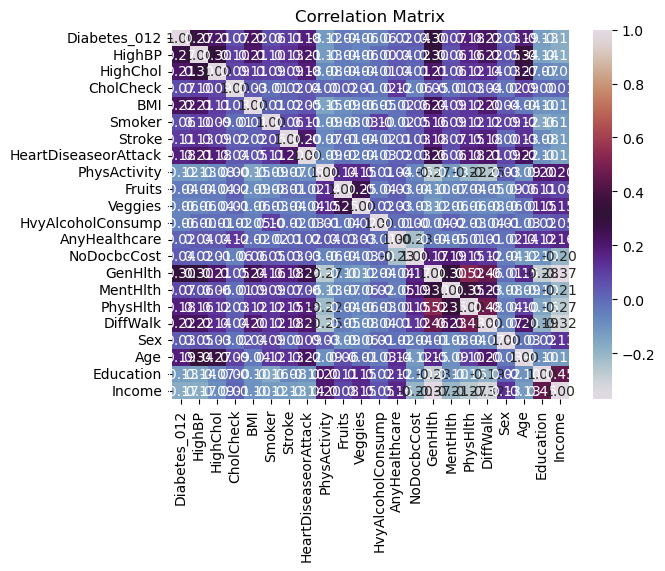

In [31]:
# Correlation matrix
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Extract the features into a new data frame
features = diabetes_df[['BMI', 'MentHlth', 'PhysHlth', 'Age']]

# Find the correlation for the features
correlation = features.corrwith(diabetes_df['Diabetes_012'])

print(correlation)

BMI         0.224379
MentHlth    0.073507
PhysHlth    0.176287
Age         0.185026
dtype: float64


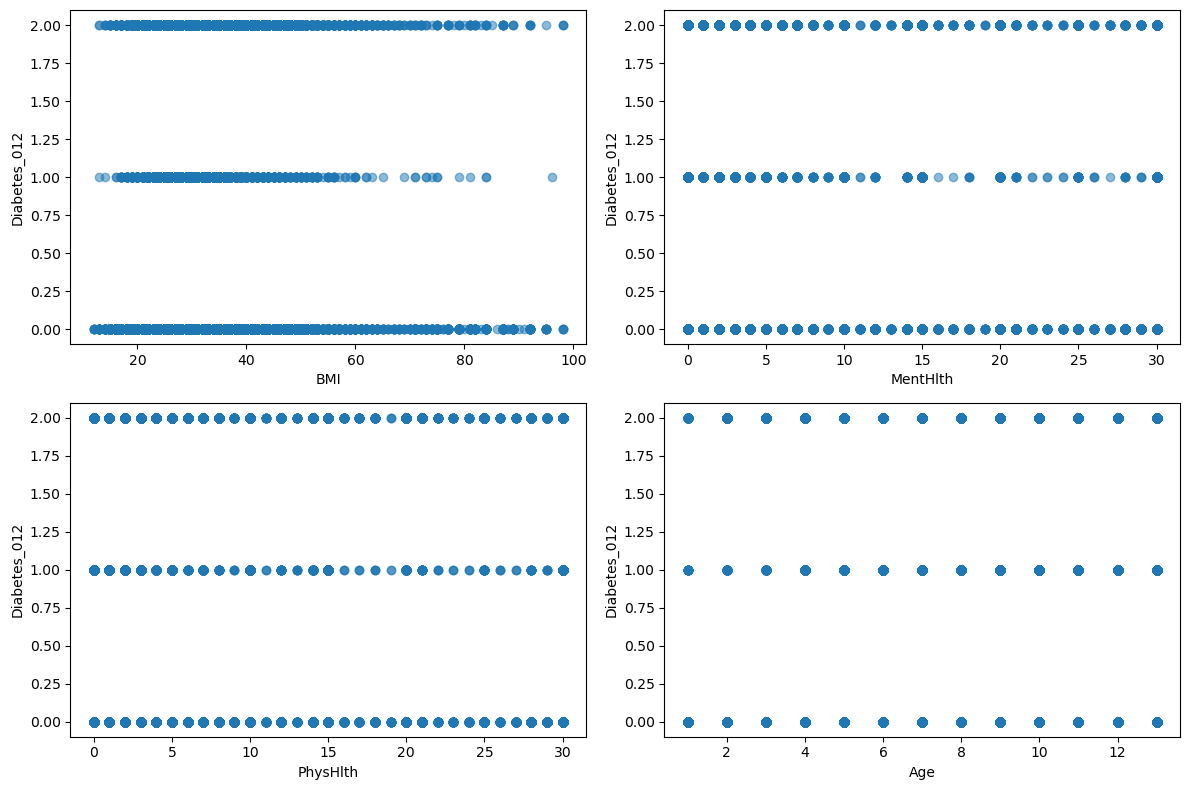

In [33]:
# Extract the features and mention the target variable
features = diabetes_df[['BMI', 'MentHlth', 'PhysHlth', 'Age']]
target = diabetes_df['Diabetes_012']

# Create the scatter plots for each feature against the target variable
plt.figure(figsize=(12, 8))

# Scatter plot for BMI
plt.subplot(2, 2, 1)
plt.scatter(features['BMI'], target, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Diabetes_012')

# Scatter plot for MentHlth
plt.subplot(2, 2, 2)
plt.scatter(features['MentHlth'], target, alpha=0.5)
plt.xlabel('MentHlth')
plt.ylabel('Diabetes_012')

# Scatter plot for PhysHlth
plt.subplot(2, 2, 3)
plt.scatter(features['PhysHlth'], target, alpha=0.5)
plt.xlabel('PhysHlth')
plt.ylabel('Diabetes_012')

# Scatter plot for Age
plt.subplot(2, 2, 4)
plt.scatter(features['Age'], target, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Diabetes_012')

plt.tight_layout()
plt.show()

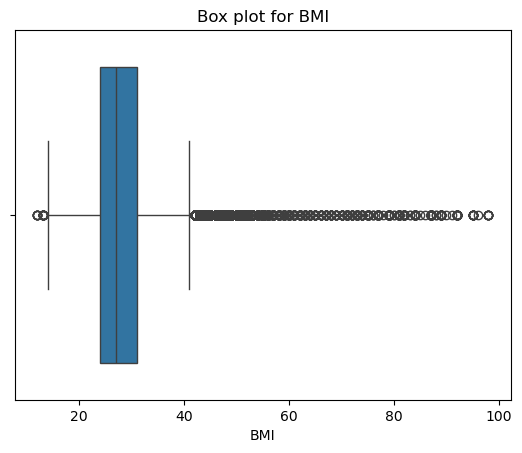

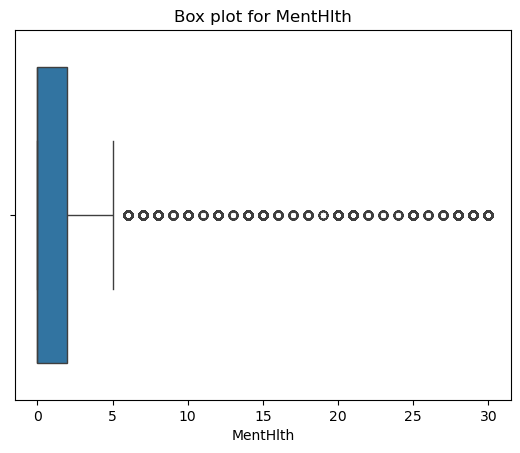

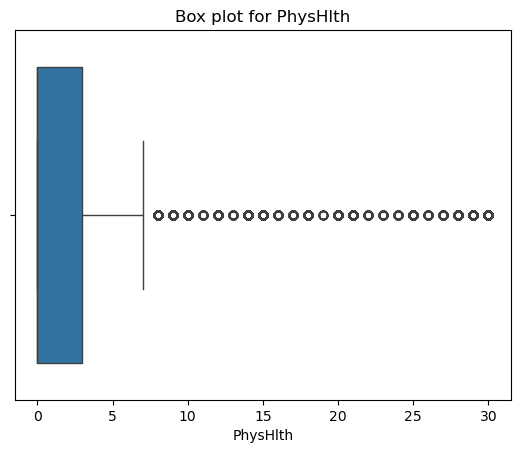

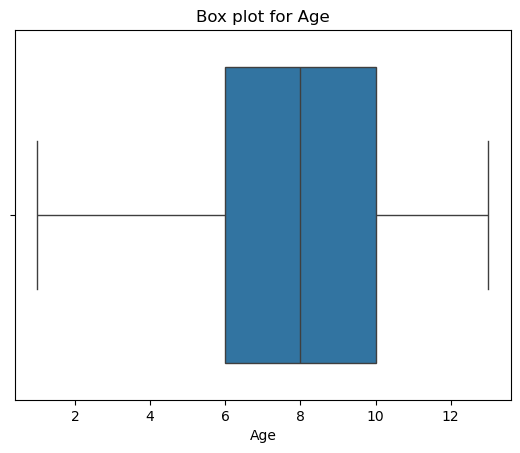

In [34]:
# Select numeric columns
numeric_columns = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Create box plots for each numeric column
for column in numeric_columns:
    sns.boxplot(x=diabetes_df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

## Question 4a — (20 points)

Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [35]:
# Find the Pearson correlation coefficients
correlation_menthlth = diabetes_df['MentHlth'].corr(diabetes_df['Diabetes_012'])
correlation_physhlth = diabetes_df['PhysHlth'].corr(diabetes_df['Diabetes_012'])
correlation_bmi = diabetes_df['BMI'].corr(diabetes_df['Diabetes_012'])
correlation_age = diabetes_df['Age'].corr(diabetes_df['Diabetes_012'])

# Print correlation coefficients
print("The Pearson correlation coefficient between MentHlth and "
      "Diabetes_012 is:", correlation_menthlth)
print("The Pearson correlation coefficient between PhysHlth and "
      "Diabetes_012 is:", correlation_physhlth)
print("The Pearson correlation coefficient between BMI and "
      "Diabetes_012 is:", correlation_bmi)
print("The Pearson correlation coefficient between Age and "
      "Diabetes_012:", correlation_age)

The Pearson correlation coefficient between MentHlth and Diabetes_012 is: 0.07350676620655927
The Pearson correlation coefficient between PhysHlth and Diabetes_012 is: 0.17628673570564077
The Pearson correlation coefficient between BMI and Diabetes_012 is: 0.224379473758398
The Pearson correlation coefficient between Age and Diabetes_012: 0.18502579410172712


In [36]:
# Select categorical columns
categorical_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
                       'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies',
                       'HvyAlcoholConsump','AnyHealthcare', 'NoDocbcCost',
                       'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']

target = diabetes_df['Diabetes_012']

p_values = {}

# Conduct a chi-square test
for column in categorical_columns:
    observed = pd.crosstab(diabetes_df[column], target)
    chi2, p, dof, expected = chi2_contingency(observed)
    p_values[column] = p

# Print p-values
print("P-values for categorical features:")
for column, p_value in p_values.items():
    print(f"{column}: {p_value}")

P-values for categorical features:
Diabetes_012: 0.0
HighBP: 0.0
HighChol: 0.0
CholCheck: 1.3291236675197173e-255
Smoker: 3.716732429411907e-220
Stroke: 0.0
HeartDiseaseorAttack: 0.0
PhysActivity: 0.0
Fruits: 2.1867028126650155e-99
Veggies: 8.029645985781328e-195
HvyAlcoholConsump: 2.2619296719502035e-185
AnyHealthcare: 9.997880563068128e-16
NoDocbcCost: 9.815789822340756e-87
GenHlth: 0.0
DiffWalk: 0.0
Sex: 3.3766786115759e-55
Education: 0.0
Income: 0.0


## Question 4b - (10 points)

Statistical tests: Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons. Note: you are welcome to use libraries to perform the tests.

In [37]:
# Seperate data by variable
diabetic_bmi = diabetes_df[diabetes_df['HvyAlcoholConsump'] == 1]
non_diabetic_bmi = diabetes_df[diabetes_df['HvyAlcoholConsump'] == 0]

diabetic_bmi = diabetic_bmi['Diabetes_012'].tolist()
non_diabetic_bmi = non_diabetic_bmi['Diabetes_012'].tolist()

# Perform Mann-Whitney U Test
u_stat, p_val_bmi = mannwhitneyu(diabetic_bmi, non_diabetic_bmi)
print(f'Mann-Whitney U test for BMI: U-statistic = {u_stat}, '
      f'p-value = {p_val_bmi}')

Mann-Whitney U test for BMI: U-statistic = 1551822328.0, p-value = 8.551961754632567e-183


Since the p-value is less that 0.05 we reject the null hypothesis. Therefore there is a significant difference between diabetes of people based on their drinking habbits.

In [38]:
# Seperate data by variable
diabetic_bmi = diabetes_df[diabetes_df['Smoker'] == 1]
non_diabetic_bmi = diabetes_df[diabetes_df['Smoker'] == 0]

diabetic_bmi = diabetic_bmi['Diabetes_012'].tolist()
non_diabetic_bmi = non_diabetic_bmi['Diabetes_012'].tolist()

# Perform Mann-Whitney U Test
u_stat, p_val_bmi = mannwhitneyu(diabetic_bmi, non_diabetic_bmi)
print(f'Mann-Whitney U test for BMI: U-statistic = {u_stat}, '
      f'p-value = {p_val_bmi}')

Mann-Whitney U test for BMI: U-statistic = 8307961107.5, p-value = 3.0555448633672225e-221


Since the p-value is less that 0.05 we reject the null hypothesis. Therefore there is a significant difference between diabetes of people based on their smoking habbits.

## Question 5 - (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [39]:
# Separate features and target variable
selected_features = ['BMI', 'Age', 'PhysHlth', 'CholCheck', 'Smoker','Fruits',
                     'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare']
X = diabetes_df[selected_features]
y = diabetes_df['Diabetes_012']

# Partition the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=7, stratify=y)

# Encode the categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = ['CholCheck', 'Smoker', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump', 'AnyHealthcare']
encoder.fit(X_train[categorical_features])

X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Normalize the numeric data
scaler = StandardScaler()
non_categorical_features = ['BMI', 'Age', 'PhysHlth']
scaler.fit(X_train[non_categorical_features])

X_train_scaled = scaler.transform(X_train[non_categorical_features])
X_test_scaled = scaler.transform(X_test[non_categorical_features])

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(
  X_train_scaled, columns=non_categorical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(
  X_test_scaled, columns=non_categorical_features, index=X_test.index)

# Convert encoded arrays back to DataFrames
X_train_encoded_df = pd.DataFrame(
  X_train_encoded, columns=encoder.get_feature_names_out(categorical_features),
  index=X_train.index)
X_test_encoded_df = pd.DataFrame(
  X_test_encoded, columns=encoder.get_feature_names_out(categorical_features),
  index=X_test.index)

# Concatenate encoded categorical and scaled numeric features
X_train_final = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)

## Question 6 — (30 points)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.

In [54]:
# Model 1, Random Forest
# Create model, fit to training data, and make a prediction
rf = RandomForestClassifier()
rf.fit(X_train_final, y_train)
pred_initial = rf.predict(X_test_final)

# Calculate the f1 score of our predition
initial_score = f1_score(y_test, pred_initial, average="macro")

print(f"The random forest model's F1 score before tuning is {round(initial_score, 2)}.")


The random forest algorithm's F1 score before tuning is 0.37.


In [71]:
# Define the parameters to tune
params = {"n_estimators": [50, 100, 150, 200], 
          "min_samples_split": [2, 3, 4, 5, 6]}

# Perform grid search and fit the model
rf_grid = GridSearchCV(rf, params)
rf_grid.fit(X_train_final, y_train)
# Make prediction on the test and train data
pred_tuned_test = rf_grid.predict(X_test_final)
pred_tuned_train = rf_grid.predict(X_train_final)

# Get f1 scores on our predictions and display them along with the best parameters
tuned_score_test = f1_score(y_test, pred_tuned_test, average="macro")
tuned_score_train = f1_score(y_train, pred_tuned_train, average="macro")
print(rf_grid.best_params_)
print(f"The random forest model's F1 scores after tuning are {round(tuned_score_test, 2)} on \
the test portion and {round(tuned_score_train, 2)} on the train portion.")

{'min_samples_split': 6, 'n_estimators': 200}
The random forest model's F1 scores after tuning are 0.37 on       the test portion and 0.45 on the train portion.


In [99]:
# Model 2, K means clustering
# Create model, fit to training data, and make a prediction
kmeans = KMeans(n_clusters = 3) # 3 clusters for our 3 different classes
kmeans.fit(X_train_final, y_train)
pred2_initial = kmeans.predict(X_test_final)

# Calculate the f1 score of our predition
initial_score2 = f1_score(y_test, pred2_initial, average="macro")

print(f"The K-Means Clustering model's F1 score before tuning is {round(initial_score2, 2)}.")

The K-Means Clustering model's F1 score before tuning is 0.31.


In [76]:
params2 = {"n_init": [1, 5, 10], 
          "max_iter": [200, 300, 400]}

# Perform grid search and fit the model
kmeans_grid = GridSearchCV(kmeans, params2)
kmeans_grid.fit(X_train_final, y_train)
# Make predictions on the train and test data
pred_tuned_test2 = kmeans_grid.predict(X_test_final)
pred_tuned_train2 = kmeans_grid.predict(X_train_final)

# Get f1 scores on our predictions and display them along with the best parameters
tuned_score_test2 = f1_score(y_test, pred_tuned_test2, average="macro")
tuned_score_train2 = f1_score(y_train, pred_tuned_train2, average="macro")
print(kmeans_grid.best_params_)
print(f"The K-Means Clustering model's F1 scores after tuning are {round(tuned_score_test2, 2)} on \
the test portion and {round(tuned_score_train2, 2)} on the train portion.")

{'max_iter': 300, 'n_init': 1}
The K-Means Clustering model's F1 scores after tuning are 0.31 on the test portion and 0.31 on the train portion.


In [77]:
# Model 3, KNN
# Create model, fit to training data, and make a prediction
knn = KNC()
knn.fit(X_train_final, y_train)
pred3_initial = knn.predict(X_test_final)

# Calculate the f1 score of our predition
initial_score3 = f1_score(y_test, pred3_initial, average="macro")

print(f"The KNN model's F1 score before tuning is {round(initial_score3, 2)}.")

The KNN model's F1 score before tuning is 0.37.


In [81]:
params3 = {"n_neighbors": [3, 4, 5, 6, 7, 8], 
          "leaf_size": [20, 30, 40, 50]}

# Perform grid search and fit the model
knn_grid = GridSearchCV(knn, params3)
knn_grid.fit(X_train_final, y_train)
# Make predictions on the test and train portions of the data
pred_tuned_test3 = knn_grid.predict(X_test_final)
pred_tuned_train3 = knn_grid.predict(X_train_final)


tuned_score_test3 = f1_score(y_test, pred_tuned_test3, average="macro")
tuned_score_train3 = f1_score(y_train, pred_tuned_train3, average="macro")
print(knn_grid.best_params_)
print(f"The KNN model's F1 scores after tuning are {round(tuned_score_test3, 2)} on \
the test portion and {round(tuned_score_train3, 2)} on the train portion.")

{'leaf_size': 20, 'n_neighbors': 8}
The KNN model's F1 scores after tuning are 0.36 on the test portion and 0.38 on the train portion.


## Question 7 — (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. 
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

All evaluations above are evalualated using F1 score. We chose this metric because in the context of healthcare classification, both false positives and the ability to find all positives are important. To recap the code above, our random forest model has an initial score of 0.37. After tuning, its score remains at     0.37 for the test portion, and we see it has a score of 0.45 on the training portion of the data with the best parameters found to be 6 for the minimum samples split and 200 for the number of estimators. The K-means clustering model has an initial score of 0.31. This score stays exactly at 0.31 after tuning on both the train and test split, and we see the optimal parameters are the default parameters which explains the identical performance. Lastly the K-nearest neighbors classifier performs with an initial score of 0.37. After tuning it performs with a score of 0.36 on the test portion and 0.38 on the train portion with the best parameters being a leaf size of 20, and 8 neighbors. 

All of our models perform slightly better on the training set of data than the test set, and the scores stay within a healthy range of each other. What this indicates is that our model is not overfitting to the data, meaning our models have relatively low variance. Possibly as a result of this, our models on average have bias with the F1 scores ranging between 0.31 and 0.45. Evidently the model is not performing exceedingly well at classifying these patients, however they are working to an extent.


## Question 8 — (10 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.

What our solutions offer is help to medical professionals in identifying patients at risk of diabetes. The models we have created can provide professionals with help in what patients should be monitored for signs of development of this disease. 

When it comes to bias, the one variable that stands out in dataset is income. While income is not included in our features used to train our models, it is worth evaluating whether our model is still experiencing bias along this framework.

Text(0.5, 0, 'Income Category')

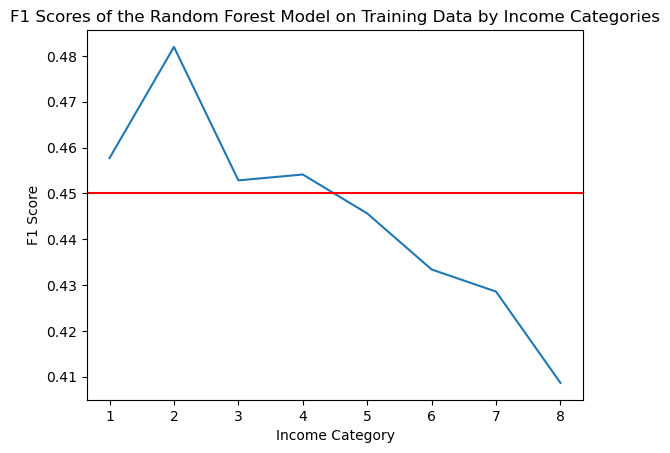

In [121]:
# Place to store the scores of our model for each income bracket
scores = []
# Perform train test split on income data with same parameters to get the income data pertaining to 
# our train data
inc = diabetes_df["Income"]
inc_train, inc_test, y_train, y_test = train_test_split(inc, y, test_size=0.3,
                                                    random_state=7, stratify=y)
# Add the income series to the training data
X_train_final["Income"] = inc_train
y_train = pd.DataFrame(y_train)
y_train["Income"] = inc_train
# Get unique income catagories and iterate through
incomes = list(X_train_final["Income"].unique())
for element in sorted(incomes):
    # Filter the data based on income
    temp_features = X_train_final[X_train_final["Income"] == element]
    temp_labels = y_train[y_train["Income"] == element]
    # Drop income columns as we can't have it for prediction and calcultion of f1 score
    temp_features = temp_features.drop("Income", axis=1)
    temp_labels = temp_labels.drop("Income", axis=1)
    # make predictions and add the f1 score of it to the list
    pred = rf_grid.predict(temp_features)
    scores.append(f1_score(temp_labels, pred, average="macro"))

plt.plot(sorted(incomes), scores)
plt.axhline(0.45, color="red")
plt.title("F1 Scores of the Random Forest Model on Training Data by Income Categories")
plt.ylabel("F1 Score")
plt.xlabel("Income Category")

This plot shows the models performance broken up by the different income categories. The horizontal line is how the model performed when run on all of the training data. As we can see the model in general performs better on people that make less money, with a higher score on the left side of the chart than the right. What this trend may necessatate is separate model creation based on financial status. Additionally the other models should be evaluated for this pattern across their training and testing data since this is only one example.